In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Change 0 entries to Nan
for i in df.columns:
    df[i] = pd.to_numeric(df[i], downcast='integer', errors='coerce')
df.Glucose = df.Glucose.replace(0, np.nan)
df.BloodPressure = df.BloodPressure.replace(0, np.nan)
df.SkinThickness = df.SkinThickness.replace(0, np.nan)
df.Insulin = df.Insulin.replace(0, np.nan)
df.BMI = df.BMI.replace(0, np.nan)
df.DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.replace(0, np.nan)
df.Age = df.Age.replace(0, np.nan)

In [5]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
#Changed the Nan to the mean values
mode_impute = SimpleImputer(missing_values = np.nan, strategy='mean')
mode_impute.fit(df['Insulin'].values.reshape(-1,1))
df[['Insulin']] = mode_impute.transform(df[['Insulin']])

mode_impute.fit(df['Glucose'].values.reshape(-1,1))
df[['Glucose']] = mode_impute.transform(df[['Glucose']])

mode_impute.fit(df['BloodPressure'].values.reshape(-1,1))
df[['BloodPressure']] = mode_impute.transform(df[['BloodPressure']])

mode_impute.fit(df['SkinThickness'].values.reshape(-1,1))
df[['SkinThickness']] = mode_impute.transform(df[['SkinThickness']])

mode_impute.fit(df['BMI'].values.reshape(-1,1))
df[['BMI']] = mode_impute.transform(df[['BMI']])


In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Testing and training sets
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [10]:
#First Random Forest with default parameters
clf = RandomForestClassifier(criterion='entropy',random_state=0)

In [11]:
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix


In [14]:
#create comfusion matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
#confusion matrix for model1 (cm1)
cm

array([[138,  19],
       [ 32,  42]], dtype=int64)

In [16]:
#Score
clf.score(X_test,y_test)

0.7792207792207793

In [20]:
#Testing diff Param
#Best Model for random forest
clf2 = RandomForestClassifier(criterion='entropy',random_state=0,max_features=8)
y_pred2 = clf.predict(X_test)

In [21]:
#Confusion matrix for best random forest
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[138,  19],
       [ 32,  42]], dtype=int64)

In [22]:
#score for best random forest
clf2.fit(X_train,y_train)

clf2.score(X_test,y_test)

0.7878787878787878

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
clf3 = LogisticRegressionCV(cv=5, random_state=0,max_iter=500,Cs=8).fit(X_train,y_train)

In [24]:
clf3.score(X_test,y_test)

0.7662337662337663

In [25]:
y_pred3 = clf3.predict(X_test)

In [26]:
#confusion matrix for logistic regression
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[140,  17],
       [ 37,  37]], dtype=int64)

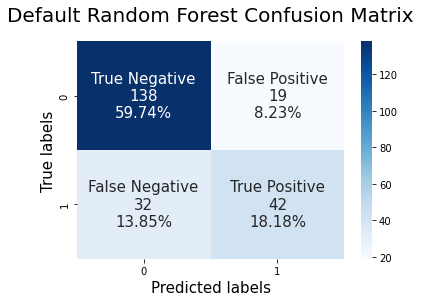

In [27]:
# Create labels for the Confusion Matrix For CM
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  # fmt = '' is necessary because fmt = 'g' (scientific notation format) is default
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('Default Random Forest Confusion Matrix', pad = 20, fontsize=20);

# Print Accuracy Score
#print("Model Accuracy for our Training Dataset with Tuning: {:.2f}%".format(accuracy_score(y_test, y_prediction) * 100))

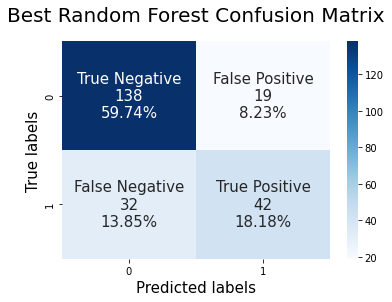

In [28]:
#Confusion Matrix CM2
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm2, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  # fmt = '' is necessary because fmt = 'g' (scientific notation format) is default
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('Best Random Forest Confusion Matrix', pad = 20, fontsize=20);



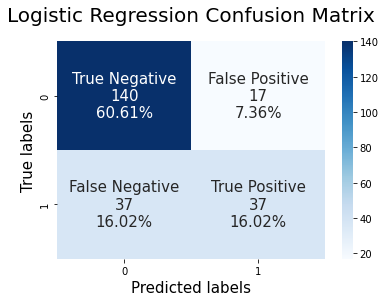

In [29]:
#Confusion matrix for logistic regression
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# Plot the Confusion Matrix
ax = plt.gca()
sns.heatmap(cm3, annot=labels, fmt='', ax=ax, cmap = plt.cm.Blues,annot_kws={"fontsize":15});  # fmt = '' is necessary because fmt = 'g' (scientific notation format) is default
ax.set_xlabel('Predicted labels', fontsize = 15);
ax.set_ylabel('True labels', fontsize = 15); 
ax.set_title('Logistic Regression Confusion Matrix', pad = 20, fontsize=20);



In [31]:
from sklearn import tree

In [32]:
fn=df.feature_names
cn=df.target_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

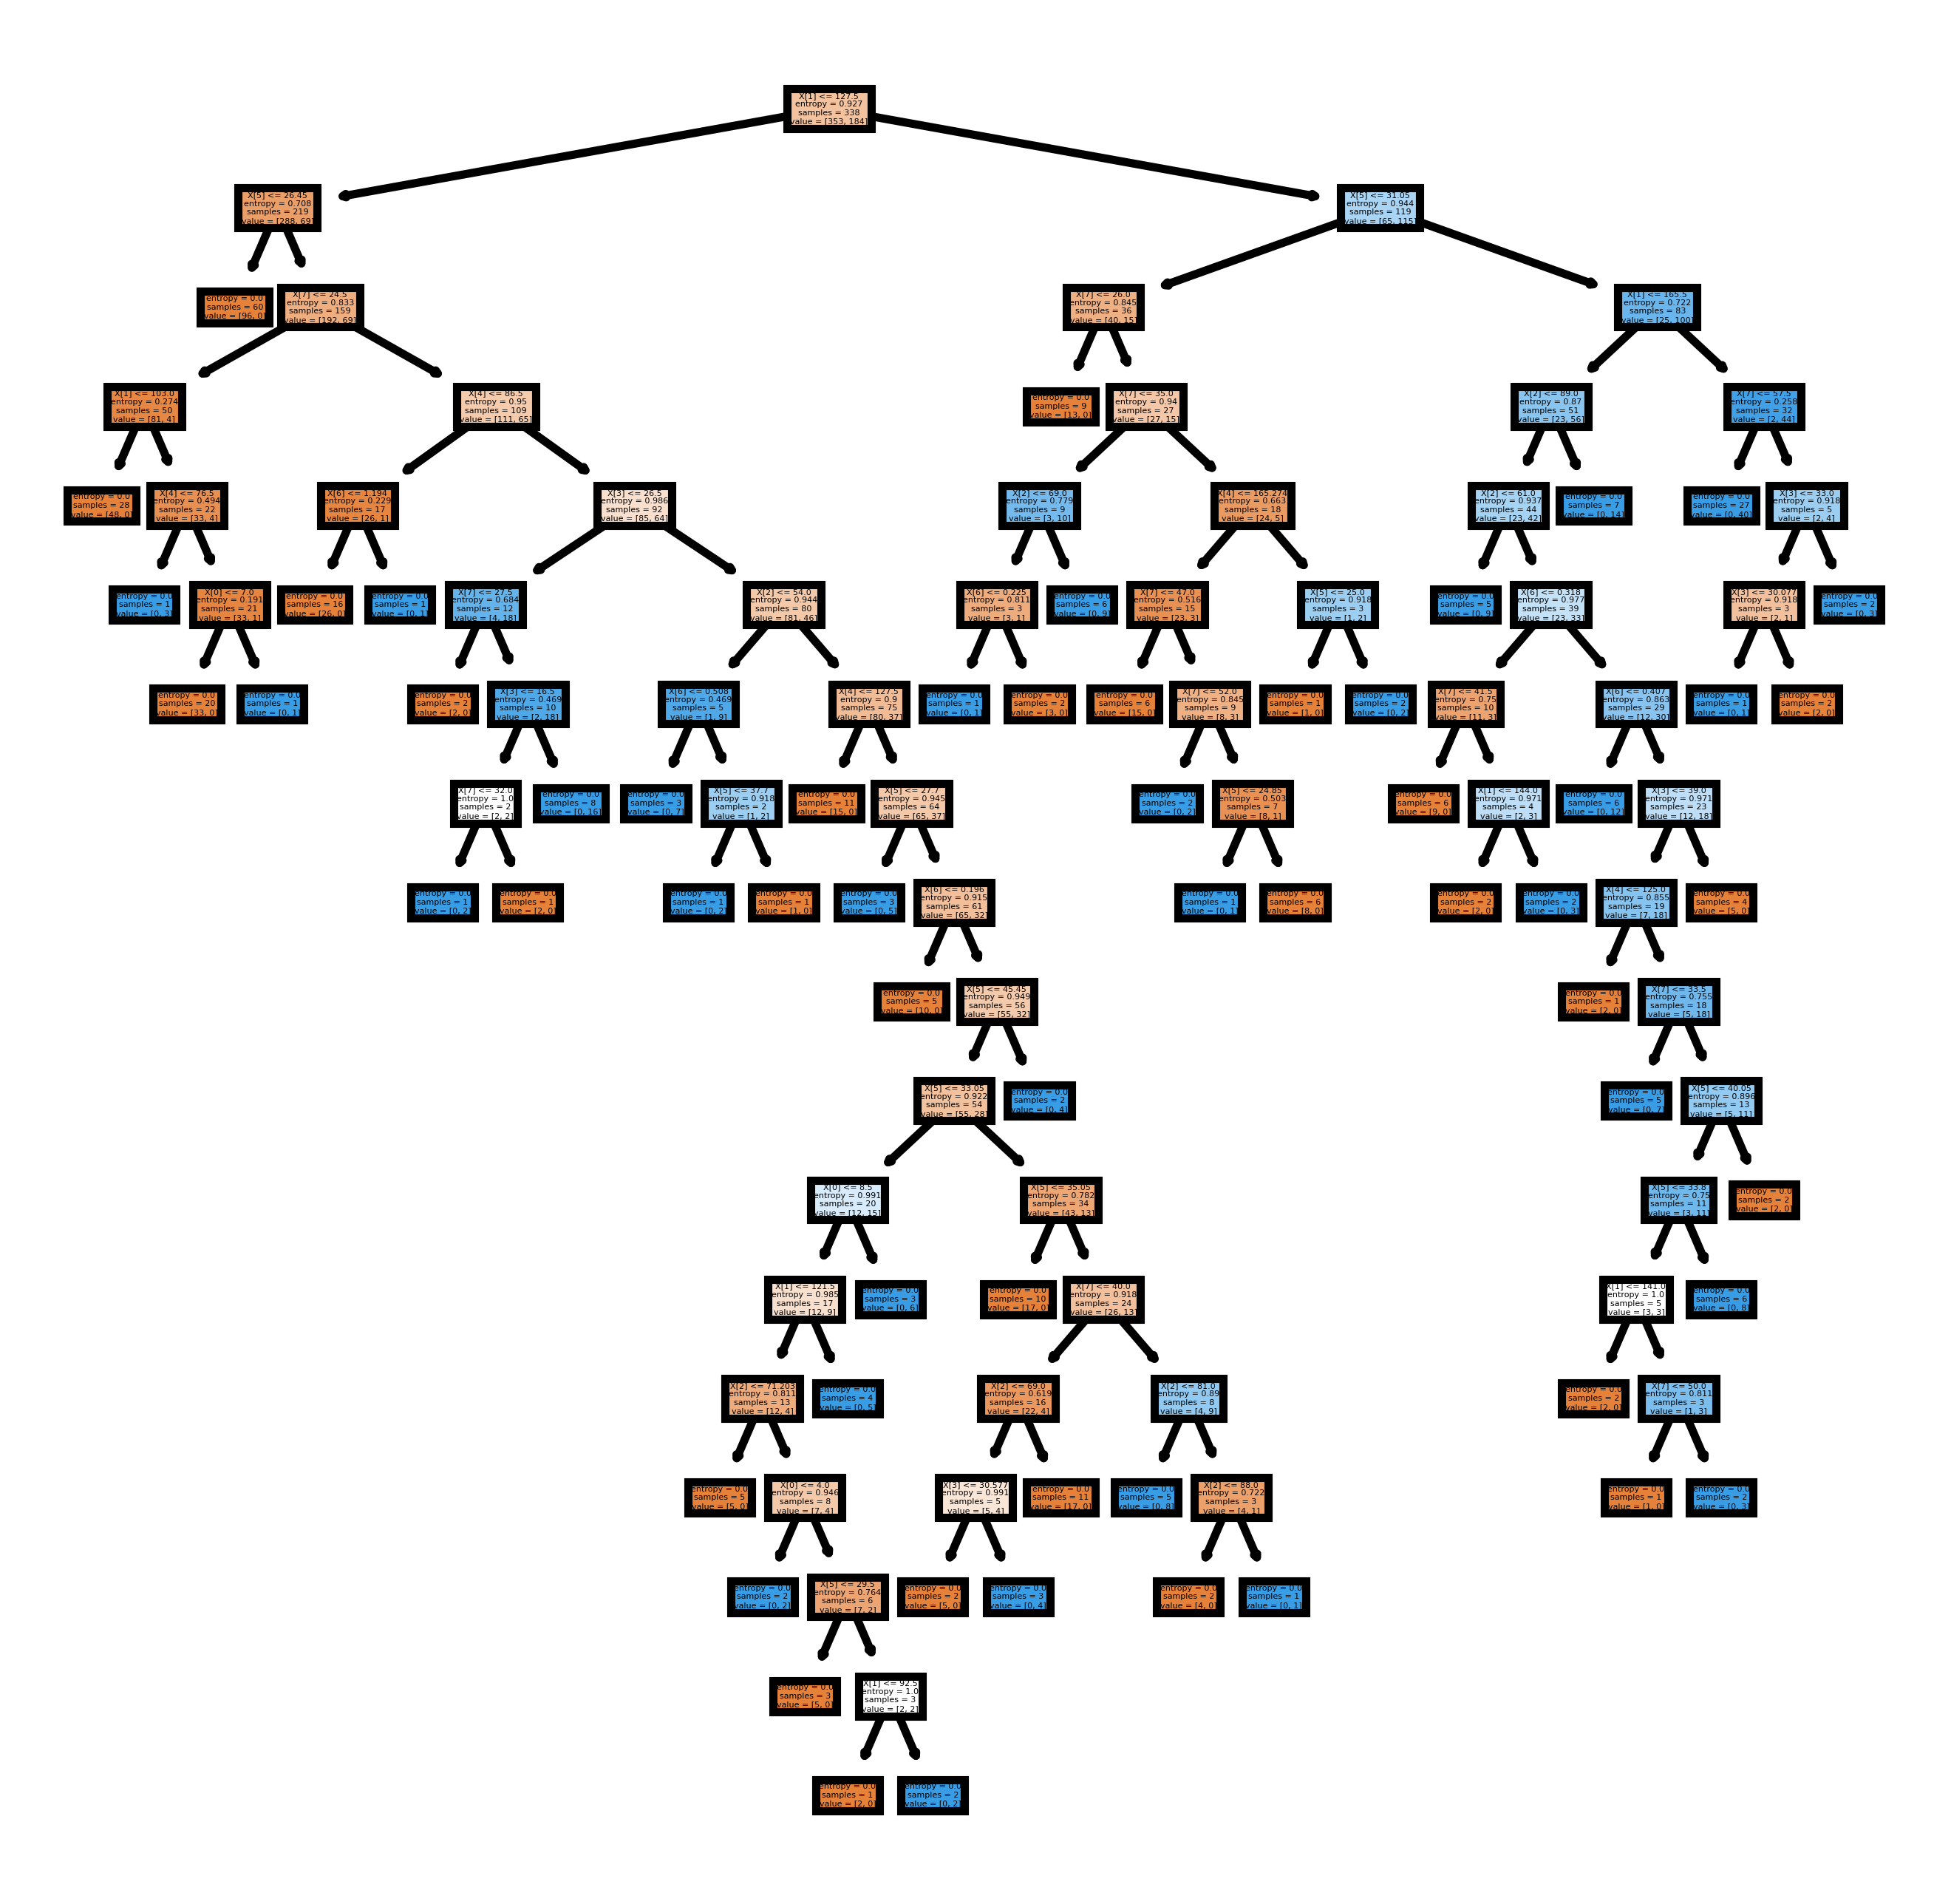

In [34]:
#Adjust RF
rf = clf2.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               #feature_names = fn, 
               #class_names=cn,
               filled = True);

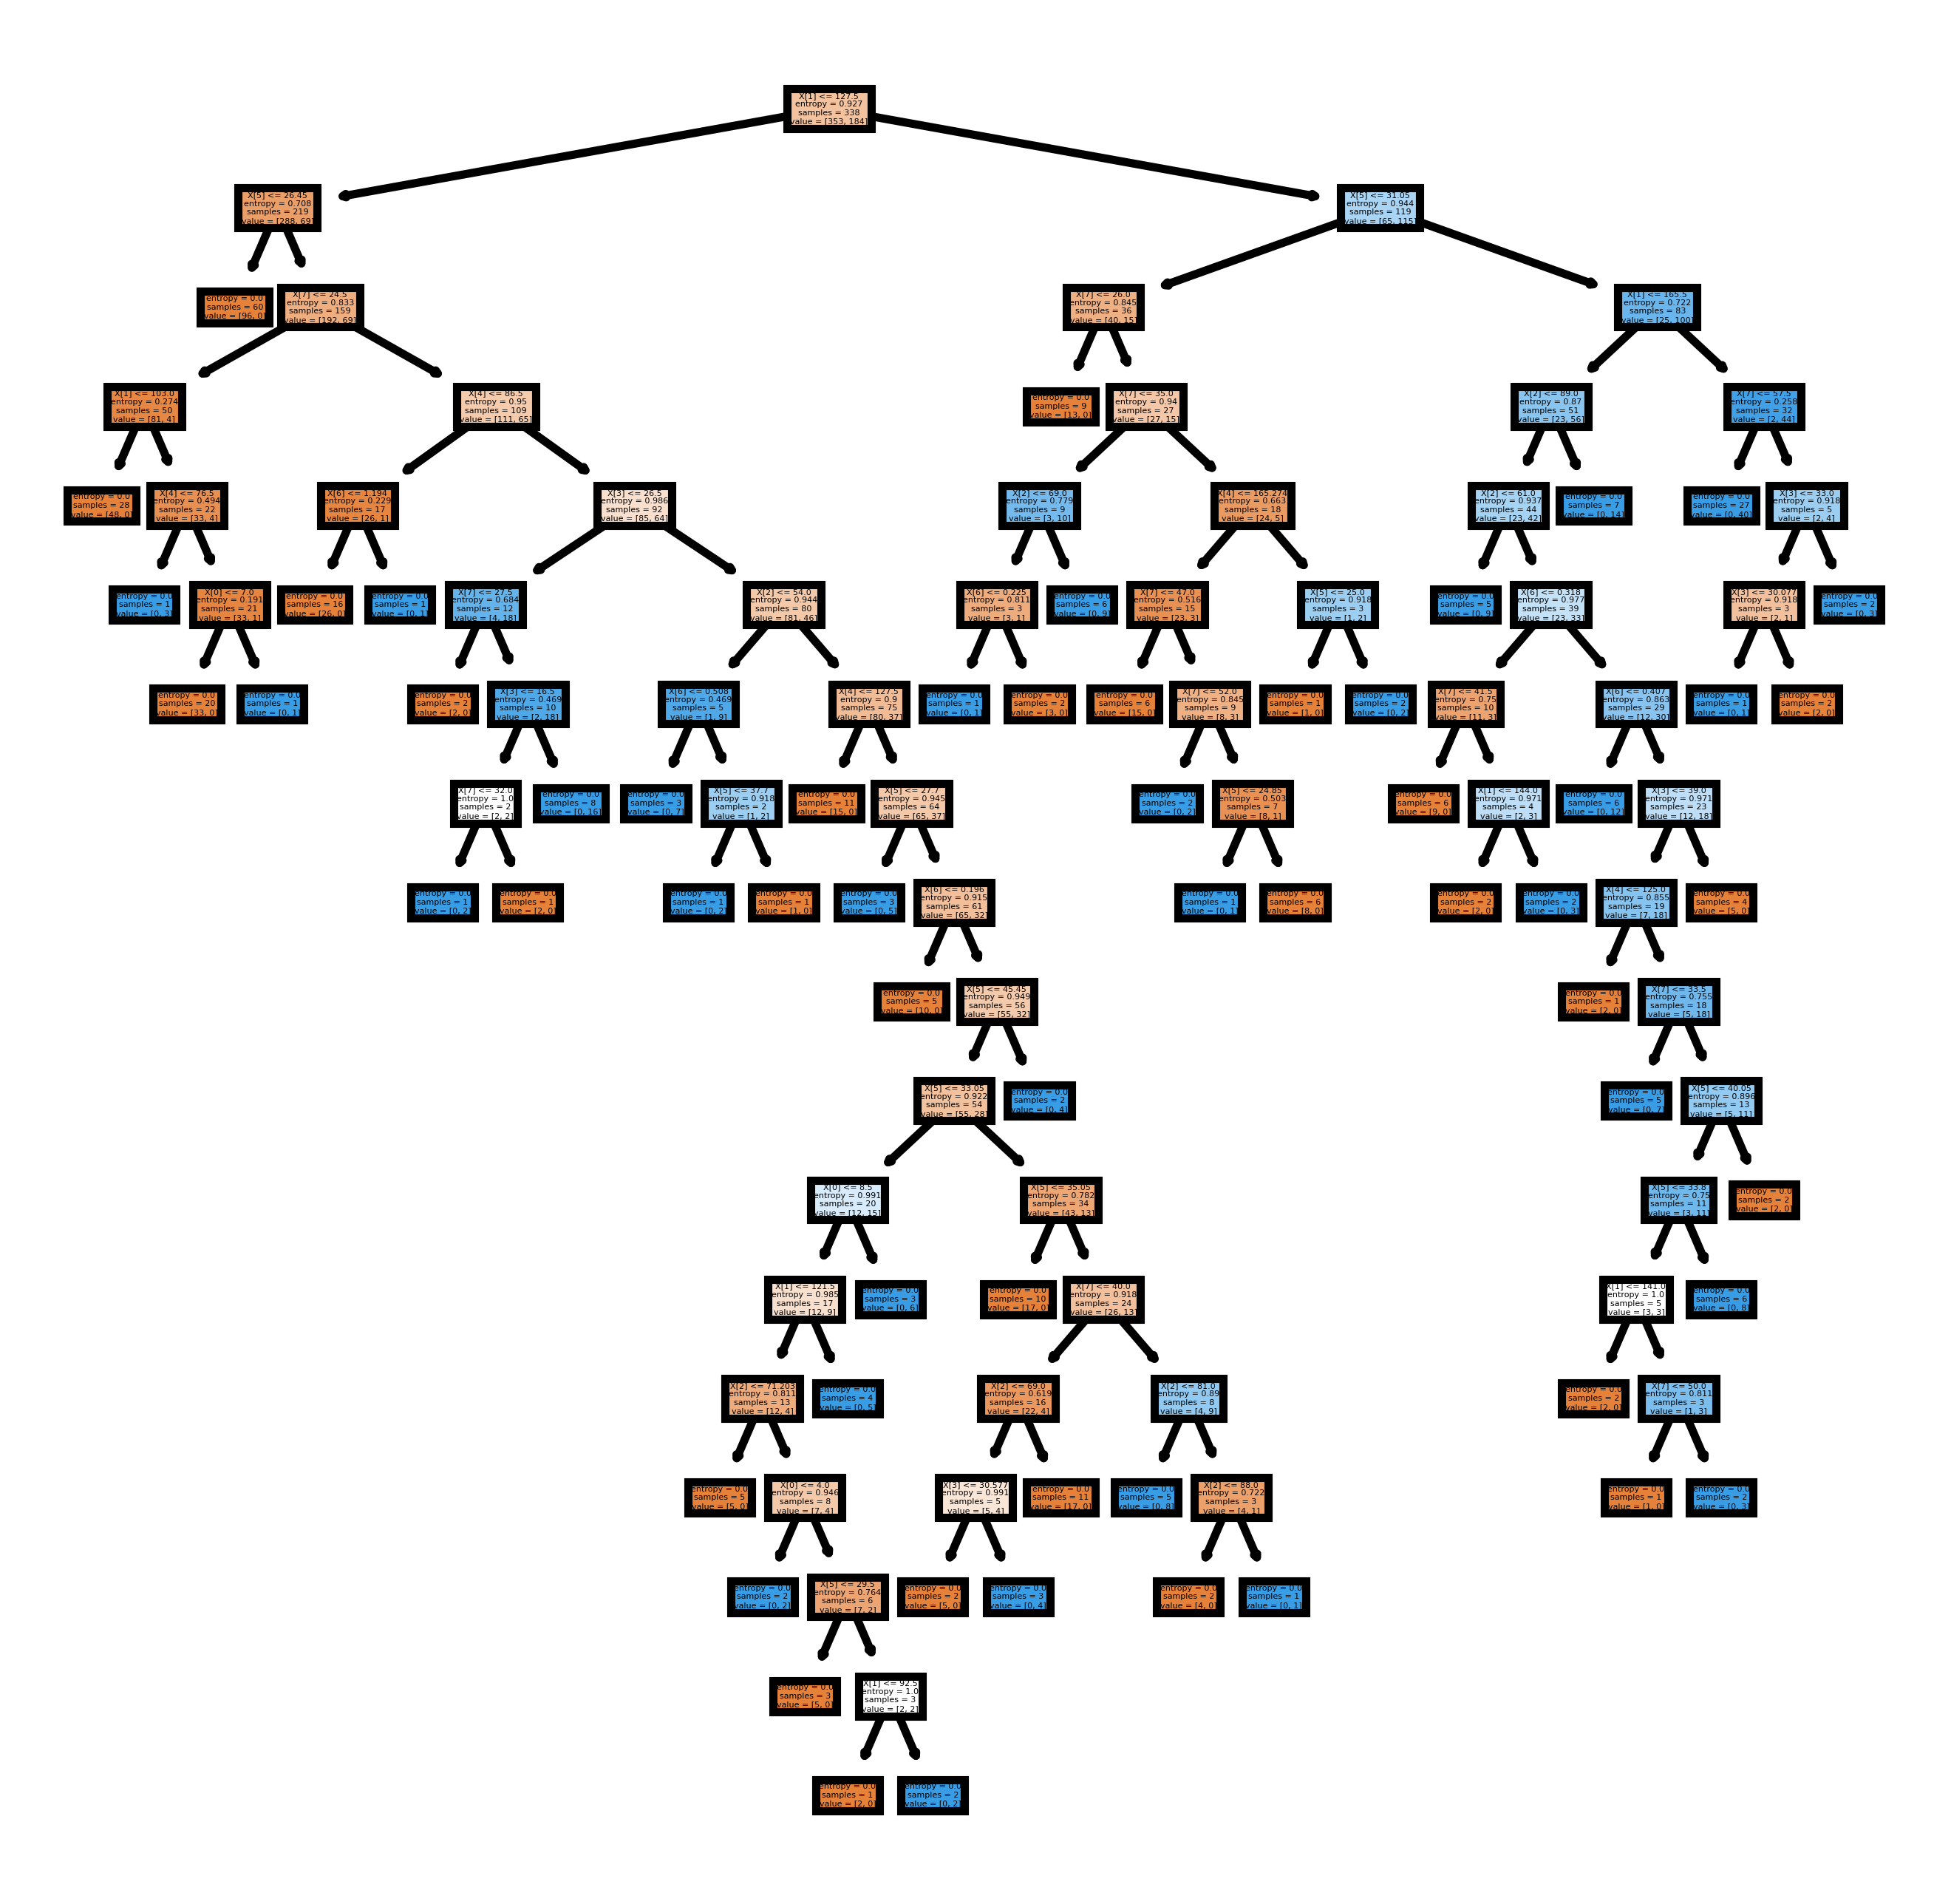

In [37]:
#Default RF
rf1 = clf.fit(X_train,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               #feature_names = fn, 
               #class_names=cn,
               filled = True);

In [35]:
#Logistic Regression Coefficients
clf3.coef_

array([[ 0.09310639,  0.03785255, -0.01796133, -0.00796755, -0.00068314,
         0.10657938,  0.47945333,  0.02442719]])

In [36]:
clf3.intercept_

array([-8.68191115])